In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


# Multiple Linear Regression

In [52]:
example = df.head()

# Feature scaling
example_x = example.drop(['median_house_value'], axis=1).to_numpy()
example_y = example['median_house_value'].to_numpy()

mean_x = np.mean(example_x, axis=0)
std_dev_x = np.std(example_x, axis=0)
mean_y = np.mean(example_y)
std_dev_y = np.std(example_y)


# Handle cases where standard deviation is zero to avoid division by zero
std_dev_x[std_dev_x == 0] = 1e-9
std_dev_y = std_dev_y if std_dev_y != 0 else 1e-9

example_x_scaled = (example_x - mean_x) / std_dev_x
example_y_scaled = (example_y - mean_y) / std_dev_y

In [53]:
example_x_scaled.shape, example_y_scaled.shape

((5, 8), (5,))

In [ ]:
# Random initial values for weights
w = np.random.randn(example_x_scaled.shape[1]) * 0.01
b = 0

In [43]:
def predict(X,w,b):
    m = X.shape[0]

    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = np.dot(w, X[i]) + b
    
    return y_pred

In [ ]:
y_hat = predict(example_x_scaled,w,b)
y_hat, example_y

(array([-37.09281411, -52.07359327,  -5.11006848,  -9.81397557,
         -9.57700345]),
 array([66900., 80100., 85700., 73400., 65500.]))

In [45]:
def plot_preds_vs_true(X,y,w,b):
    y_pred = predict(X,w,b)
    X_pts = np.arange(0,X.shape[0])

    plt.figure(figsize=(5,4))
    plt.scatter(X_pts, y_pred, color='red', label='y_pred')
    plt.scatter(X_pts, y, color='blue', label='y_true')
    plt.legend()

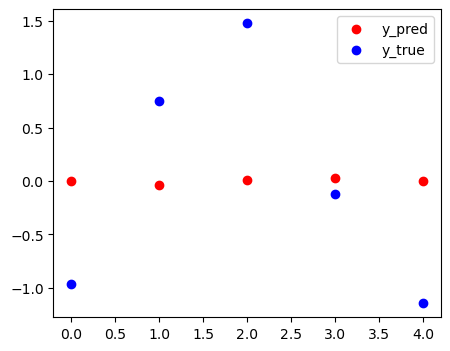

In [54]:
plot_preds_vs_true(example_x_scaled, example_y_scaled, w, b)

## MSE Loss Function (MLR)

In [55]:
def calculate_error(X,y,w,b):
    m = X.shape[0]

    y_pred = predict(X,w,b)

    # MSE function
    sum = np.sum((y_pred - y)**2)
    residual = sum / (2 * m)
    return residual

In [57]:
# Error is very low here, which is great! If we didn't standardize the variables, the error would be huge.
calculate_error(example_x_scaled, example_y_scaled, w, b)

np.float64(0.5038608970730015)

## Gradient Descent

In [58]:
def grad_step(X, y, w, b):
    # Number of training examples
    m = X.shape[0]

    # Number of features
    n = X.shape[1]

    partial_dw = np.zeros(n)
    partial_db = 0

    for i in range(m):
        error = np.dot(w, X[i]) + b - y[i]

        partial_dw += error * X[i]
        partial_db += error

    partial_dw /= m    
    partial_db /= m

    return partial_dw, partial_db

In [61]:
def gradient_descent(X, y, w, b, epochs=1000, alpha=0.001, log_interval=100):
    history = {}

    for epoch in range(epochs):
        partial_dw, partial_db = grad_step(X,y,w,b)

        w = w - alpha*partial_dw
        b = b - alpha*partial_db

        if epoch % log_interval == 0:
            cost = calculate_error(X,y,w,b)
            history[epoch] = cost

            print(f"Iteration {epoch} - Cost: {cost}")
    return history, w, b

In [63]:
history_ex, w_new_ex, b_new_ex = gradient_descent(example_x_scaled, example_y_scaled, w, b)

Iteration 0 - Cost: 0.5035342831234955
Iteration 100 - Cost: 0.4750878264110505
Iteration 200 - Cost: 0.45156259814156813
Iteration 300 - Cost: 0.4305063493197858
Iteration 400 - Cost: 0.411024715369577
Iteration 500 - Cost: 0.3927466560462455
Iteration 600 - Cost: 0.3754854025885065
Iteration 700 - Cost: 0.3591254212247974
Iteration 800 - Cost: 0.34358327669627603
Iteration 900 - Cost: 0.32879300235990544


## Scale Up: Run Model on Entire Dataset


In [65]:
X = df.drop(['median_house_value'], axis=1).to_numpy()
y = df['median_house_value'].to_numpy()

# Scale the full dataset
mean_x = np.mean(X, axis=0)
std_dev_x = np.std(X, axis=0)
mean_y = np.mean(y)
std_dev_y = np.std(y)

# Handle cases where standard deviation is zero to avoid division by zero
std_dev_x[std_dev_x == 0] = 1e-9
std_dev_y = std_dev_y if std_dev_y != 0 else 1e-9

X_scaled = (X - mean_x) / std_dev_x
y_scaled = (y - mean_y) / std_dev_y

# Random initial values for weights
w = np.random.randn(X_scaled.shape[1]) * 0.001 # Smaller initial weights
b = 0

history, w_new, b_new = gradient_descent(X_scaled, y_scaled, w, b)

Iteration 0 - Cost: 0.49996825762199626
Iteration 100 - Cost: 0.4515847433983663
Iteration 200 - Cost: 0.4120765594416468
Iteration 300 - Cost: 0.3796552627237818
Iteration 400 - Cost: 0.35295421443442265
Iteration 500 - Cost: 0.330901064327705
Iteration 600 - Cost: 0.31264034241516997
Iteration 700 - Cost: 0.2974826387689562
Iteration 800 - Cost: 0.2848688923108242
Iteration 900 - Cost: 0.2743439610405125
